Decision trees and feature selection are frequently used. Using the Iris dataset, which is the Sklearn library's own dataset, we create a simple decision tree, identify the important features, and define the decision boundaries.

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
#dataset examination
from sklearn.datasets import load_iris
import pandas as pd 

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.head())
print(iris.DESCR)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Stat

In [43]:
# train-test split
from sklearn.model_selection import train_test_split

X = iris.data #features
y = iris.target #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# creat model decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
tree_clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [45]:
# test
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"confusion matrix:\n {conf_matrix}")


accuracy: 1.0
confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


[Text(0.3076923076923077, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.23076923076923078, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.2692307692307693, 0.8333333333333333, 'True  '),
 Text(0.38461538461538464, 0.75, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.34615384615384615, 0.8333333333333333, '  False'),
 Text(0.15384615384615385, 0.5833333333333334, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.5833333333333334, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virgini

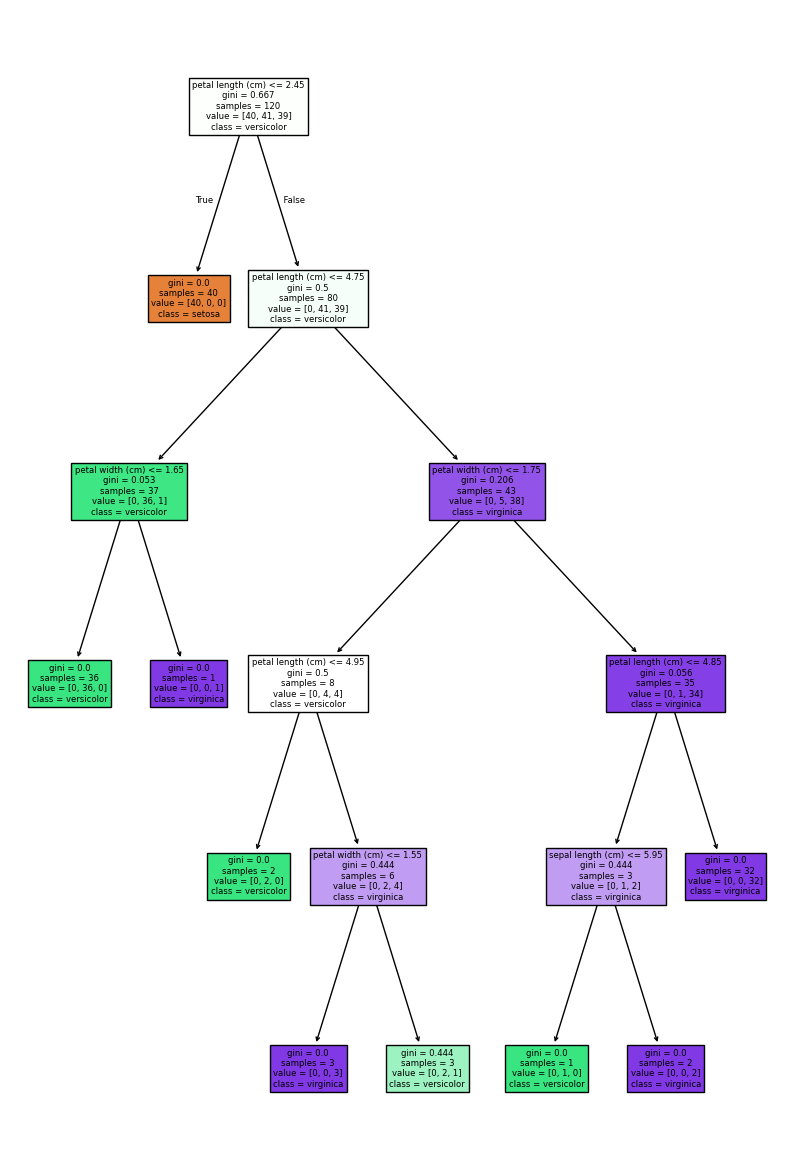

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,15))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)

In [47]:
# importance features
feature_importance = tree_clf.feature_importances_
feature_names = iris.feature_names

feature_importance_sort = sorted(zip(feature_importance, feature_names), reverse=True)

for importance, feature_name in feature_importance_sort:
    print(f"{feature_name}: {importance}")

petal length (cm): 0.9045522597319637
petal width (cm): 0.07849499604256478
sepal length (cm): 0.016952744225471498
sepal width (cm): 0.0


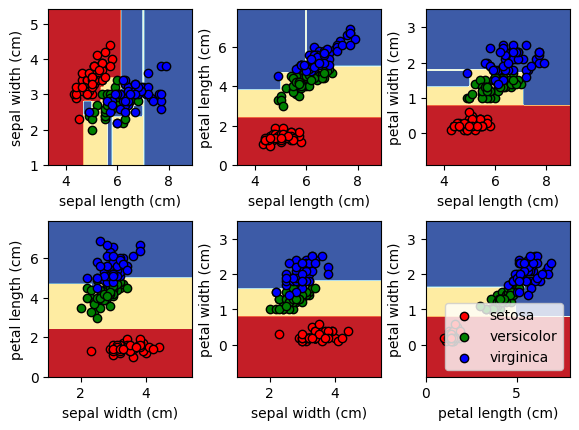

In [48]:
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

n_classes = len(iris.target_names)
plot_colors = "rgb"

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = DecisionTreeClassifier().fit(X,y)

    ax = plt.subplot(2, 3, pairidx+1)
    plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)
    
    DecisionBoundaryDisplay.from_estimator(clf, X,
                                           cmap = plt.cm.RdYlBu,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel=iris.feature_names[pair[0]],
                                           ylabel=iris.feature_names[pair[1]]
                                           )
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where( y==i )
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolors="black")

plt.legend()